In [2]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")

# Quick overview
print(train_data.head())
print(train_data.info())
print(train_data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [4]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


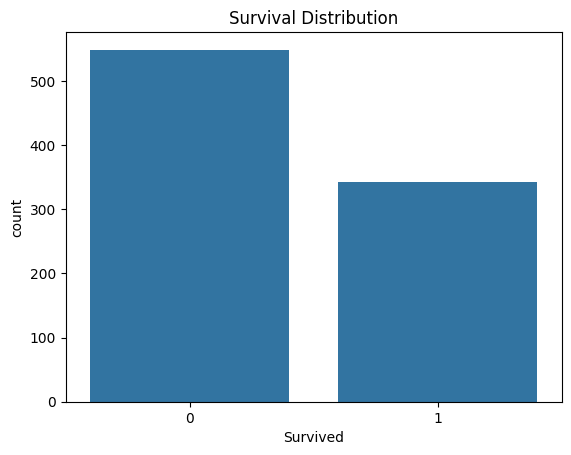

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_data, x='Survived')
plt.title("Survival Distribution")
plt.show()

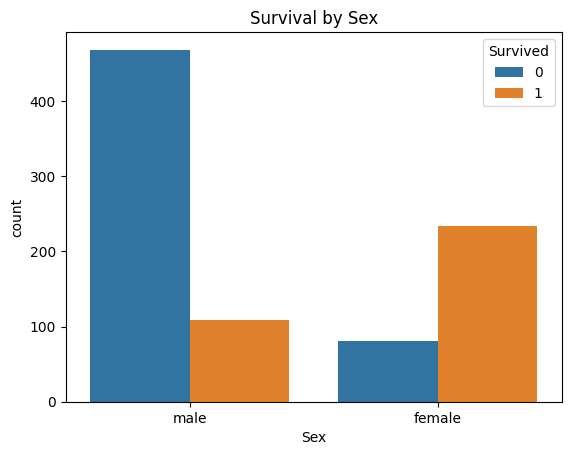

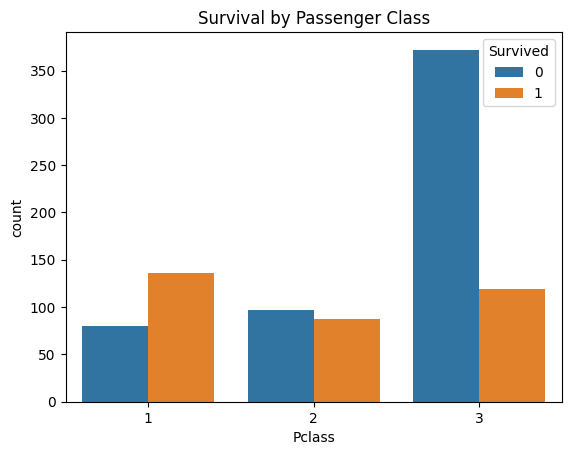

In [6]:
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

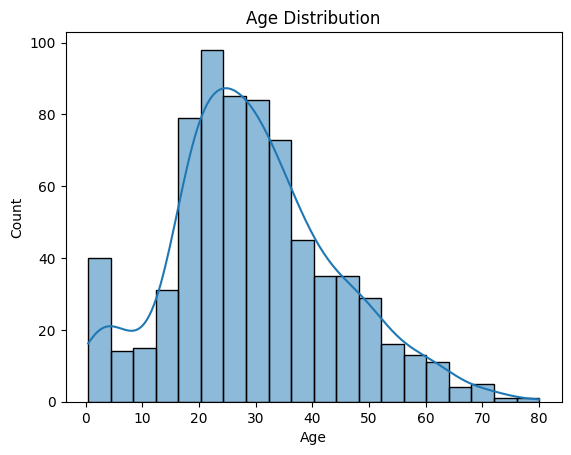

In [7]:
sns.histplot(train_data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

In [8]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [9]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

In [10]:
train_data = train_data.drop(columns=['Cabin'])
test_data = test_data.drop(columns=['Cabin'])

In [11]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [12]:
train_data = train_data.drop(columns=['PassengerId', 'Name', 'Ticket'])
test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [13]:
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']

X_test = test_data

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=1000)

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-Score: 0.7638888888888888
ROC-AUC: 0.8824967824967825


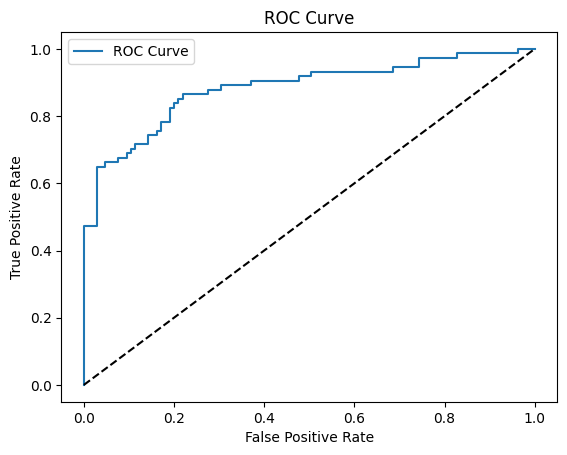

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-Score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))

fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [18]:
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Coefficient": model.coef_[0]})
print(feature_importance.sort_values(by="Coefficient", ascending=False))

      Feature  Coefficient
4        Fare     0.002577
1         Age    -0.030619
3       Parch    -0.108317
6  Embarked_Q    -0.112920
2       SibSp    -0.295650
7  Embarked_S    -0.399413
0      Pclass    -0.938457
5    Sex_male    -2.592309


In [24]:
test_predictions = model.predict(X_test)

original_test_data = pd.read_csv("Titanic_test.csv")

submission = pd.DataFrame({'PassengerId': original_test_data['PassengerId'], 'Survived': test_predictions})
submission.to_csv("submission.csv", index=False)

In [27]:
!pip install streamlit
import pickle
import streamlit as st

with open("titanic_model.pkl", "wb") as file:
    pickle.dump(model, file)

model = pickle.load(open("titanic_model.pkl", "rb"))